In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.2 MB/s eta 0:00:00


In [ ]:


import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji

#For tokenization
nltk.download('stopwords') # low-value words: (the,is,it,etc...)
nltk.download('punkt') #lemmatization
nltk.download('wordnet')  # word and sentence tokenization
nltk.download('punkt_tab')
# Load data
train = pd.read_parquet('/content/train-00000-of-00001.parquet')
test = pd.read_parquet('/content/test-00000-of-00001.parquet')
valid = pd.read_parquet('/content/validation-00000-of-00001.parquet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:

# Define preprocessing function
def clean_tweet(text):
    text = str(text).lower() #kolo lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove usernames and tags
    text = re.sub(r'#', '', text)     # Remove hashtags (just the #, keep word) (Remove el underscore??)
    text = emoji.replace_emoji(text, replace='')  # Remove emojis
    text = re.sub(r'(?<=\d)/(?=\d)', 'SLASH_PLACEHOLDER', text)
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = text.replace('SLASH_PLACEHOLDER', '/')
    return text





In [ ]:
# Show the first few rows of each set
print("Train set sample:")
print(train.head())

print("\nValidation set sample:")
print(valid.head())

print("\nTest set sample:")
print(test.head())
print(test['text'][6])

Train set sample:
                                                text  label
0  "QT @user In the original draft of the 7th boo...      2
1  "Ben Smith / Smith (concussion) remains out of...      1
2  Sorry bout the stream last night I crashed out...      1
3  Chase Headley's RBI double in the 8th inning o...      1
4  @user Alciato: Bee will invest 150 million in ...      2

Validation set sample:
                                                text  label
0  Dark Souls 3 April Launch Date Confirmed With ...      1
1  "National hot dog day, national tequila day, t...      2
2  When girls become bandwagon fans of the Packer...      0
3  @user I may or may not have searched it up on ...      1
4  Here's your starting TUESDAY MORNING Line up a...      1

Test set sample:
                                                text  label
0  @user @user what do these '1/2 naked pics' hav...      1
1  OH: “I had a blue penis while I was this” [pla...      1
2  @user @user That's coming, but I thin

In [ ]:

# Apply cleaning
train['clean_text'] = train['text'].apply(clean_tweet)
valid['clean_text'] = valid['text'].apply(clean_tweet)
test['clean_text'] = test['text'].apply(clean_tweet)
#NOW TWEETS ARE ONLY WORDS AND SENTENCES


In [ ]:
# Tokenization and Lemmatization
lemmatizer = WordNetLemmatizer()
def tokenize_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens


In [ ]:

train['tokens'] = train['clean_text'].apply(tokenize_lemmatize)
valid['tokens'] = valid['clean_text'].apply(tokenize_lemmatize)
test['tokens'] = test['clean_text'].apply(tokenize_lemmatize)


In [ ]:
\

# Show the first few rows of each set
print("Train set sample:")
print(train.head())

print("\nValidation set sample:")
print(valid.head())

print("\nTest set sample:")
print(test.head())
print(test['text'][6])
print(test['clean_text'][6])

Train set sample:
                                                text  label  \
0  "QT @user In the original draft of the 7th boo...      2   
1  "Ben Smith / Smith (concussion) remains out of...      1   
2  Sorry bout the stream last night I crashed out...      1   
3  Chase Headley's RBI double in the 8th inning o...      1   
4  @user Alciato: Bee will invest 150 million in ...      2   

                                          clean_text  \
0   qt  in the original draft of the 7th book  re...   
1   ben smith   smith  concussion  remains out of...   
2  sorry bout the stream last night i crashed out...   
3  chase headley s rbi double in the 8th inning o...   
4   alciato  bee will invest 150 million in janua...   

                                              tokens  
0  [qt, in, the, original, draft, of, the, 7th, b...  
1  [ben, smith, smith, concussion, remains, out, ...  
2  [sorry, bout, the, stream, last, night, i, cra...  
3  [chase, headley, s, rbi, double, in, the, 8

Class distribution in training set:
label
1    20673
2    17849
0     7093
Name: count, dtype: int64


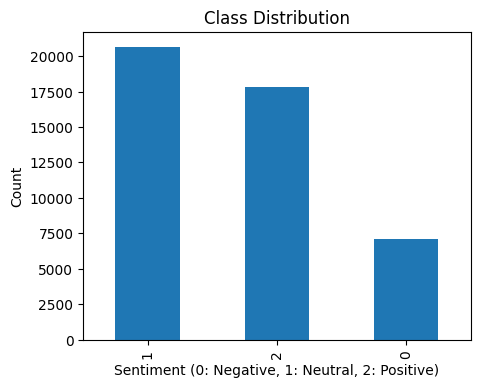

In [ ]:
import matplotlib.pyplot as plt

# If label column is named differently, adjust 'label'
print("Class distribution in training set:")
print(train['label'].value_counts())

# Visualize
plt.figure(figsize=(5,4))
train['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Sentiment (0: Negative, 1: Neutral, 2: Positive)')
plt.ylabel('Count')
plt.show()


In [ ]:
from collections import Counter



# Apply cleaning and tokenization/lemmatization if not already done
train['clean_text'] = train['text'].apply(clean_tweet)
train['tokens'] = train['clean_text'].apply(tokenize_lemmatize)

# Find most common words for each class
for label, sentiment in zip([0,1,2], ['Negative', 'Neutral', 'Positive']):
    all_words = [word for tokens in train[train['label']==label]['tokens'] for word in tokens]
    most_common = Counter(all_words).most_common(10)
    print(f"\nTop 10 words for {sentiment}:")
    print(most_common)



Top 10 words for Negative:
[('the', 5800), ('to', 3250), ('i', 3242), ('a', 2799), ('in', 2014), ('and', 1971), ('is', 1898), ('of', 1849), ('it', 1786), ('on', 1784)]

Top 10 words for Neutral:
[('the', 17865), ('to', 9219), ('a', 6629), ('in', 6589), ('on', 6319), ('i', 6024), ('and', 5419), ('of', 4929), ('for', 4429), ('s', 4008)]

Top 10 words for Positive:
[('the', 14336), ('to', 8482), ('i', 7627), ('a', 6010), ('and', 5309), ('in', 5114), ('on', 5018), ('for', 4243), ('it', 4161), ('of', 4118)]


In [ ]:
from collections import Counter



# Apply cleaning and tokenization/lemmatization if not already done
train['clean_text'] = train['text'].apply(clean_tweet)
train['tokens'] = train['clean_text'].apply(tokenize_lemmatize)

# Find most common words for each class
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

for label, sentiment in zip([0,1,2], ['Negative', 'Neutral', 'Positive']):
    all_words = [
        word
        for tokens in train[train['label']==label]['tokens']
        for word in tokens
        if word not in stop_words
    ]
    most_common = Counter(all_words).most_common(10)
    print(f"\nTop 10 words for {sentiment} (without stopwords):")
    print(most_common)




Top 10 words for Negative (without stopwords):
[('may', 1573), ('tomorrow', 930), ('wa', 717), ('u002c', 691), ('like', 599), ('1st', 497), ('day', 496), ('going', 428), ('get', 423), ('time', 388)]

Top 10 words for Neutral (without stopwords):
[('tomorrow', 2938), ('may', 2906), ('u002c', 2245), ('day', 1484), ('wa', 1477), ('night', 1327), ('going', 1319), ('sunday', 1244), ('friday', 1215), ('1st', 1172)]

Top 10 words for Positive (without stopwords):
[('tomorrow', 3516), ('day', 2254), ('may', 2209), ('see', 1569), ('u002c', 1531), ('night', 1508), ('wa', 1334), ('going', 1284), ('friday', 1273), ('time', 1163)]


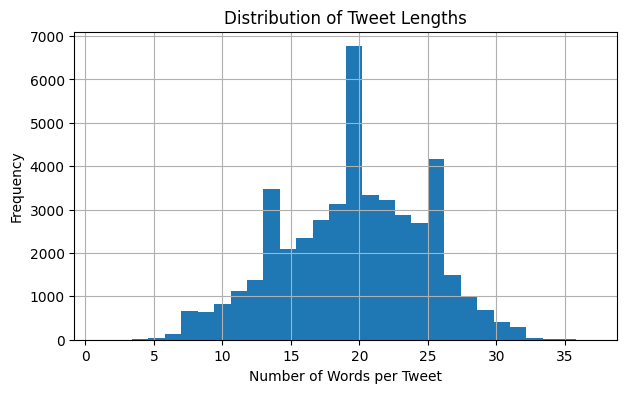

In [ ]:
# Calculate tweet lengths
train['tweet_length'] = train['tokens'].apply(len)

# Plot
plt.figure(figsize=(7,4))
train['tweet_length'].hist(bins=30)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Words per Tweet')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

#nltk.download('punkt')
#nltk.download('wordnet')

#lemmatizer = WordNetLemmatizer()

def tokenize_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Apply the cleaning function (clean_tweet) to valid and test sets
# This creates the 'clean_text' column which is missing
valid['clean_text'] = valid['text'].apply(clean_tweet)
test['clean_text'] = test['text'].apply(clean_tweet)

# Create the tokens column for each split
train['tokens'] = train['clean_text'].apply(tokenize_lemmatize)
valid['tokens'] = valid['clean_text'].apply(tokenize_lemmatize)
test['tokens']  = test['clean_text'].apply(tokenize_lemmatize)


In [ ]:
from collections import Counter
import torch
from torch.utils.data import Dataset, DataLoader

# 1. Build vocabulary from training tokens
all_tokens = [token for tokens in train['tokens'] for token in tokens]
token_freq = Counter(all_tokens)
vocab = {'<PAD>': 0, '<OOV>': 1}
for token in token_freq:
    vocab[token] = len(vocab)

# 2. Function to encode tokens and pad/truncate
MAX_LEN = max(train['tweet_length'])

def tokens_to_ids(tokens, vocab):
    return [vocab.get(token, vocab['<OOV>']) for token in tokens]

def pad_or_truncate(seq, max_len=MAX_LEN):
    seq = seq[:max_len]
    if len(seq) < max_len:
        seq += [vocab['<PAD>']] * (max_len - len(seq))
    return seq

# 3. Apply to all datasets
train['input_ids'] = train['tokens'].apply(lambda x: pad_or_truncate(tokens_to_ids(x, vocab)))
valid['input_ids'] = valid['tokens'].apply(lambda x: pad_or_truncate(tokens_to_ids(x, vocab)))
test['input_ids']  = test['tokens'].apply(lambda x: pad_or_truncate(tokens_to_ids(x, vocab)))

# 4. Create PyTorch datasets and loaders
class TweetDataset(Dataset):
    def __init__(self, input_ids, labels=None):
        self.input_ids = input_ids
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        x = torch.tensor(self.input_ids[idx], dtype=torch.long)
        if self.labels is not None:
            y = torch.tensor(self.labels[idx], dtype=torch.long)
            return x, y
        else:
            return x

train_dataset = TweetDataset(train['input_ids'], train['label'])
valid_dataset = TweetDataset(valid['input_ids'], valid['label'])
test_dataset  = TweetDataset(test['input_ids'],test['label'])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32)
test_loader  = DataLoader(test_dataset, batch_size=32)

print(f"Vocab size: {len(vocab)}")
print("Sample input IDs:", train['input_ids'][0])
print(vocab)


Vocab size: 39986
Sample input IDs: [2, 3, 4, 5, 6, 7, 4, 8, 9, 10, 11, 12, 4, 13, 7, 14, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
{'<PAD>': 0, '<OOV>': 1, 'qt': 2, 'in': 3, 'the': 4, 'original': 5, 'draft': 6, 'of': 7, '7th': 8, 'book': 9, 'remus': 10, 'lupin': 11, 'survived': 12, 'battle': 13, 'hogwarts': 14, 'happybirthdayremuslupin': 15, 'ben': 16, 'smith': 17, 'concussion': 18, 'remains': 19, 'out': 20, 'lineup': 21, 'thursday': 22, 'curtis': 23, 'nhl': 24, 'sj': 25, 'sorry': 26, 'bout': 27, 'stream': 28, 'last': 29, 'night': 30, 'i': 31, 'crashed': 32, 'but': 33, 'will': 34, 'be': 35, 'on': 36, 'tonight': 37, 'for': 38, 'sure': 39, 'then': 40, 'back': 41, 'to': 42, 'minecraft': 43, 'pc': 44, 'tomorrow': 45, 'chase': 46, 'headley': 47, 's': 48, 'rbi': 49, 'double': 50, '8th': 51, 'inning': 52, 'off': 53, 'david': 54, 'price': 55, 'snapped': 56, 'a': 57, 'yankee': 58, 'streak': 59, '33': 60, 'consecutive': 61, 'scoreless': 62, 'against': 63, 'blue': 64, 'jay'

Simple RNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=3):
        super(SimpleRNN, self).__init__()
        # Embedding layer: Converts token IDs to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # RNN layer: Takes the embedded vectors as input
        self.rnn = nn.RNN(embedding_dim, hidden_size, batch_first=True)

        # Fully connected layer: Maps RNN output to final predictions (e.g., for classification)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x=self.embedding(x)

        out, _ = self.rnn(x)
        # We take the output of the last time step (index -1)

        out = self.fc(out)
        out = out[:, -1, :]  # Shape: [batch_size, hidden_size]
        return out

vocab_size = len(vocab)
embedding_dim = 128  # Can adjust this
hidden_size = 64
output_size = 3  # For 3 classes (modify according to your task)
model = SimpleRNN(vocab_size, embedding_dim, hidden_size, output_size)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Assuming multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# Device setup (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_epochs = 5
print(model.embedding.weight.requires_grad)


def trainmodel():
    best_val_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            # After loss.backward()
            #for name, param in model.named_parameters():
            #  if param.grad is not None:
            #    print(f"{name} grad mean: {param.grad.abs().mean().item():.8f}")

            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}")

        # Validate after each epoch
        val_loss, val_accuracy = validatemodel()
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pt")

def validatemodel():
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
            predicted = outputs.argmax(1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = total_val_loss / len(valid_loader)
    val_accuracy = (correct_val / total_val) * 100
    return avg_val_loss, val_accuracy


def predict():
    # Switch model to evaluation mode
    model.eval()

    # Store predictions and labels
    predictions = []
    true_labels = []

    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Get predicted class (index with highest score)
            _, predicted = torch.max(outputs, dim=1)

            # Move tensors to CPU and extend lists
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Convert to numpy arrays
    predictions = np.array(predictions)
    true_labels = np.array(true_labels)

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Confusion matrix and classification report
    print("\nConfusion Matrix:")
    print(confusion_matrix(true_labels, predictions))

    print("\nClassification Report:")
    print(classification_report(true_labels, predictions, digits=4))


True


In [ ]:
trainmodel()


Epoch 1, Train Loss: 1.0173
Val Loss: 1.0211, Val Accuracy: 43.55%
Epoch 2, Train Loss: 1.0107
Val Loss: 1.0164, Val Accuracy: 43.70%
Epoch 3, Train Loss: 1.0027
Val Loss: 1.0169, Val Accuracy: 43.55%
Epoch 4, Train Loss: 0.9946
Val Loss: 1.0094, Val Accuracy: 43.25%
Epoch 5, Train Loss: 0.9864
Val Loss: 1.0097, Val Accuracy: 42.60%


In [ ]:
predict()

Test Accuracy: 48.75%

Confusion Matrix:
[[ 364 3422  186]
 [ 232 5587  118]
 [  59 2278   38]]

Classification Report:
              precision    recall  f1-score   support

           0     0.5557    0.0916    0.1573      3972
           1     0.4950    0.9410    0.6487      5937
           2     0.1111    0.0160    0.0280      2375

    accuracy                         0.4875     12284
   macro avg     0.3873    0.3496    0.2780     12284
weighted avg     0.4404    0.4875    0.3698     12284



Stacked RNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

class StackedRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=3):
        super(StackedRNN, self).__init__()
        # Embedding layer: Converts token IDs to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.dropout = nn.Dropout(0.3)

        self.rnn1 = nn.RNN(embedding_dim, hidden_size, batch_first=True, nonlinearity='relu')
        self.rnn2 = nn.RNN(hidden_size, hidden_size, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x=self.embedding(x)

        out, _ = self.rnn1(x)
        out, _ = self.rnn2(out)
        out = out[:, -1, :]  # Take last time step
        out = self.dropout(out)
        out = self.fc(out)
        return out


In [ ]:
model = StackedRNN(vocab_size, embedding_dim, hidden_size, output_size)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Assuming multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Device setup (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_epochs = 5




In [ ]:
trainmodel()

Epoch 1, Train Loss: 1.0194
Val Loss: 1.0183, Val Accuracy: 43.45%
Epoch 2, Train Loss: 1.0051
Val Loss: 0.9849, Val Accuracy: 45.65%
Epoch 3, Train Loss: 0.9448
Val Loss: 0.9448, Val Accuracy: 48.70%
Epoch 4, Train Loss: 0.8927
Val Loss: 0.8997, Val Accuracy: 52.60%
Epoch 5, Train Loss: 0.8651
Val Loss: 0.8978, Val Accuracy: 52.80%


In [ ]:
predict()

Test Accuracy: 51.40%

Confusion Matrix:
[[1678 1989  305]
 [ 863 3377 1697]
 [  87 1029 1259]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6385    0.4225    0.5085      3972
           1     0.5281    0.5688    0.5477      5937
           2     0.3861    0.5301    0.4468      2375

    accuracy                         0.5140     12284
   macro avg     0.5176    0.5071    0.5010     12284
weighted avg     0.5363    0.5140    0.5155     12284



Bi-Directional RNN

In [ ]:
import torch
import torch.nn as nn

class BidirectionalSimpleRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size):
        super(BidirectionalSimpleRNN, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim,padding_idx=0)

        self.rnn = nn.RNN(embedding_dim, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # hidden_size * 2 because bidirectional

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # last time step
        out = self.fc(out)
        return out

In [ ]:
model = BidirectionalSimpleRNN(vocab_size, embedding_dim, hidden_size, output_size)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Assuming multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Device setup (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_epochs = 10

In [ ]:
trainmodel()

Epoch 1, Train Loss: 1.0067
Val Loss: 0.9931, Val Accuracy: 44.70%
Epoch 2, Train Loss: 0.9845
Val Loss: 0.9438, Val Accuracy: 50.60%
Epoch 3, Train Loss: 0.8856
Val Loss: 0.8843, Val Accuracy: 56.15%
Epoch 4, Train Loss: 0.7965
Val Loss: 0.8934, Val Accuracy: 56.60%
Epoch 5, Train Loss: 0.7223
Val Loss: 0.8327, Val Accuracy: 62.90%
Epoch 6, Train Loss: 0.6643
Val Loss: 0.8738, Val Accuracy: 62.55%
Epoch 7, Train Loss: 0.6062
Val Loss: 0.8509, Val Accuracy: 64.75%
Epoch 8, Train Loss: 0.5576
Val Loss: 0.9137, Val Accuracy: 63.70%
Epoch 9, Train Loss: 0.5236
Val Loss: 0.9011, Val Accuracy: 63.70%
Epoch 10, Train Loss: 0.4887
Val Loss: 1.0343, Val Accuracy: 62.90%


In [ ]:
predict()

Test Accuracy: 55.21%

Confusion Matrix:
[[1835 1766  371]
 [1084 3468 1385]
 [  72  824 1479]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6135    0.4620    0.5271      3972
           1     0.5725    0.5841    0.5782      5937
           2     0.4572    0.6227    0.5273      2375

    accuracy                         0.5521     12284
   macro avg     0.5477    0.5563    0.5442     12284
weighted avg     0.5634    0.5521    0.5518     12284

